<a href="https://colab.research.google.com/github/AndreMaulanaMustofa/PCVK_Genap_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

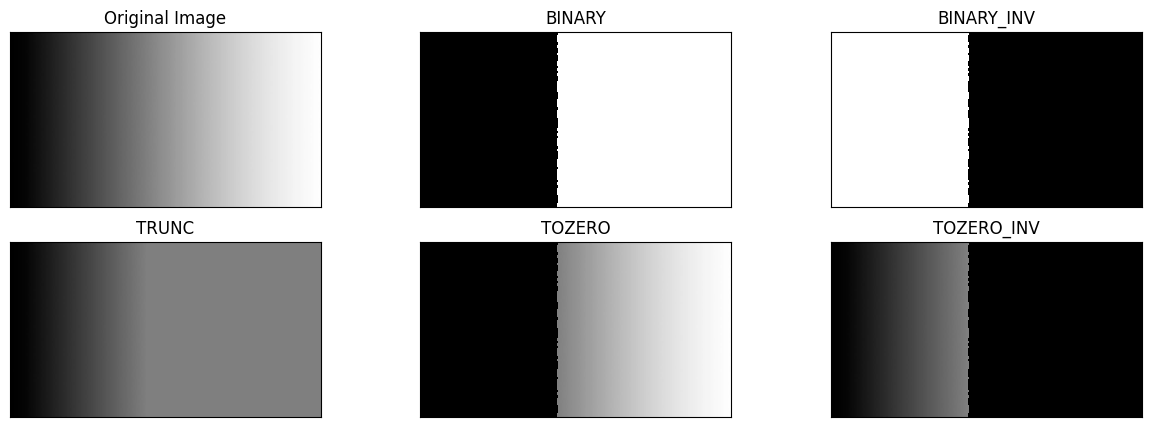

In [ ]:
# Load gambar
img = cv2.imread('/content/drive/MyDrive/Andre/gradient.jpg')

thresh = 127 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY) 
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv2.threshold(img,thresh,255,cv2.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO) 
#5. Threshold Tozero Inverse
ret,thresh5 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO_INV) 

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

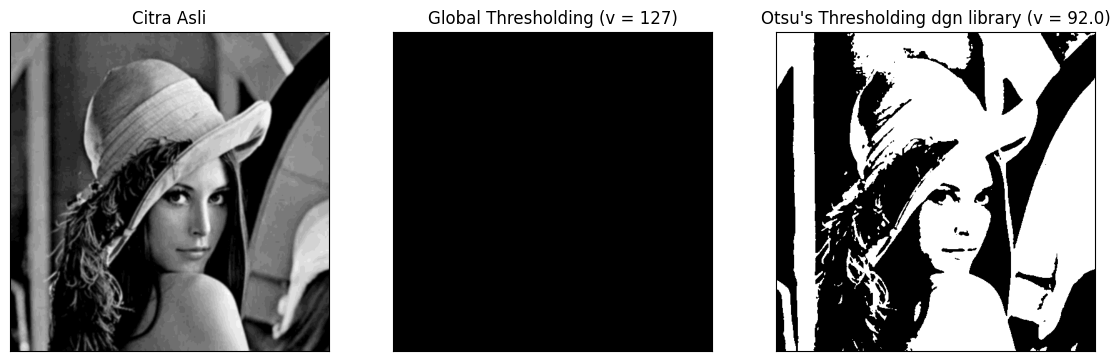

In [ ]:
filename = ('/content/drive/MyDrive/Andre/lena_gs_lc2.jpg')

img = cv2.imread(filename,0)
blur = cv2.GaussianBlur(img,(5,5),0)

thresh = 127

ret,th1 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (14,10))

for i in range(len(citra3)):
 plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

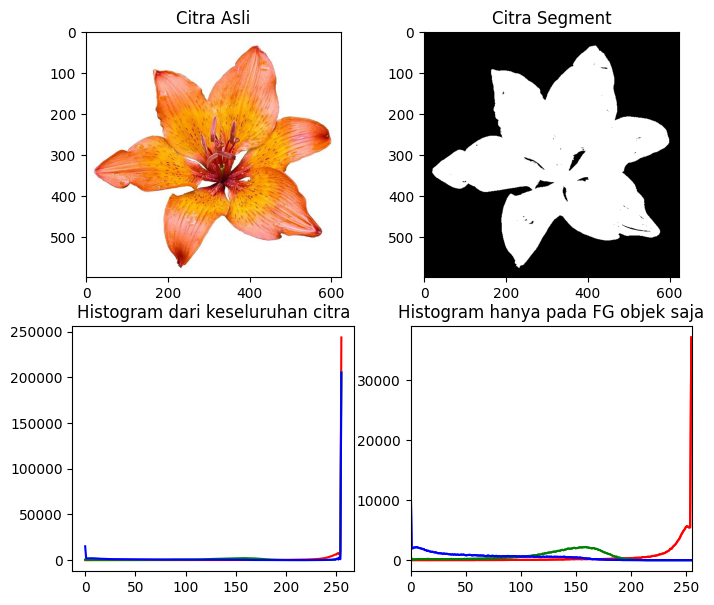

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Andre/lily.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (8,7))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7f2c2f147310>)

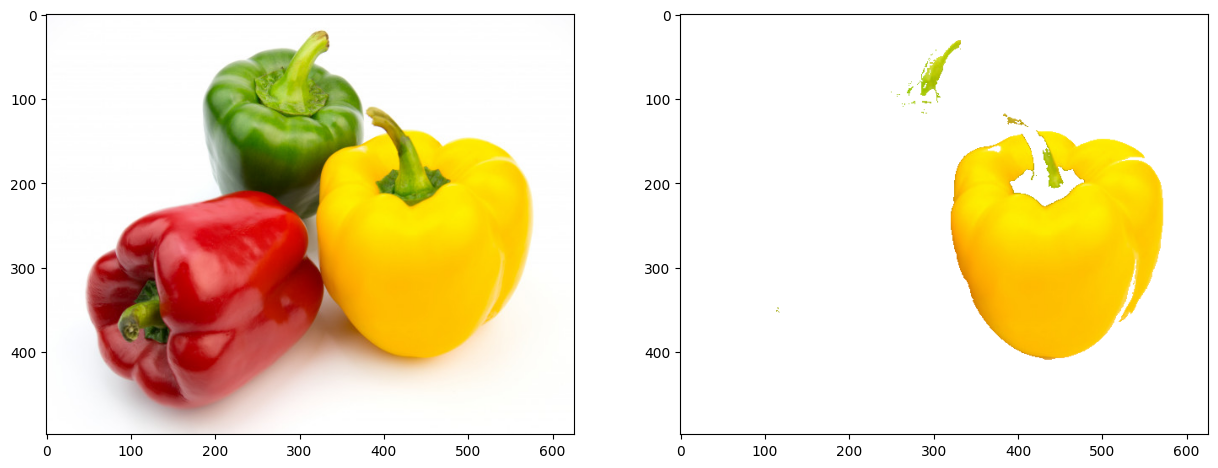

In [105]:
img = ('/content/drive/MyDrive/Andre/peppers.jpg')
img_peppers = cv2.imread(img)
imgRGB = cv2.cvtColor(img_peppers,cv2.COLOR_BGR2RGB)

pixel_values = imgRGB.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). 
# Untuk percobaan ini kita akan gunakan 3 cluster untuk image ini

k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# konversi titik centroid ke dalam integer
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

masked_image = np.copy(imgRGB)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(imgRGB.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(imgRGB)
plt.subplot(2,2,2),plt.imshow(masked_image0)

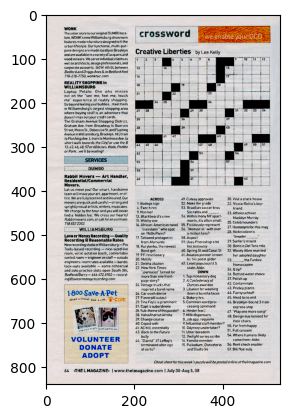

In [106]:
img = cv2.imread('/content/drive/MyDrive/Andre/crossword.jpg')
img_rgb3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img_rgb3, 125, 255, cv2.THRESH_TOZERO)

plt.imshow(thresh)